In [1]:
!cd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tips = pd.read_csv('.//tips.csv')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
 tips.groupby([tips['day'],tips['time']]).count()

total_bill  tip  sex  smoker  size
day  time                                      
Fri  Dinner          12   12   12      12    12
     Lunch            7    7    7       7     7
Sat  Dinner          87   87   87      87    87
Sun  Dinner          76   76   76      76    76
Thur Dinner           1    1    1       1     1
     Lunch           61   61   61      61    61

In [6]:
t_bill = tips.total_bill

<function matplotlib.pyplot.show(close=None, block=None)>

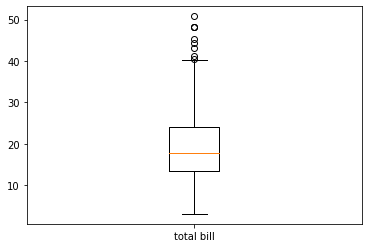

In [7]:
plt.boxplot(t_bill, labels=['total bill'])
plt.show

In [8]:
import seaborn as sns

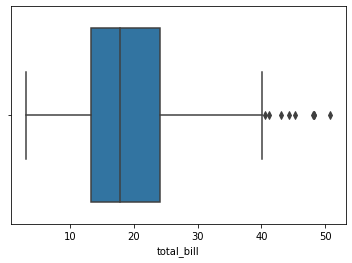

In [9]:
t_sns_bill = sns.boxplot(x='total_bill', data=tips)


In [10]:
t_tips = tips.tip

<function matplotlib.pyplot.show(close=None, block=None)>

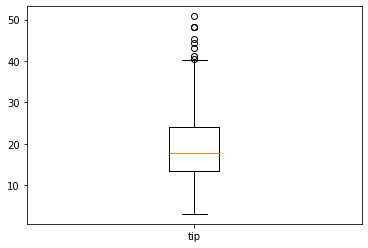

In [11]:
plt.boxplot(t_bill, labels=['tip']) # 분산값이 더 크다는 것을 의미
plt.show

In [12]:
t_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

<AxesSubplot:xlabel='size', ylabel='tip'>

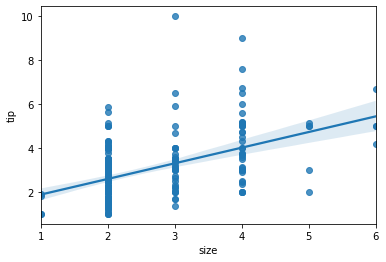

In [13]:
sns.regplot(x='size', y='tip', data = tips)

In [14]:
tip_rate=tips["tip"] / tips["total_bill"]

/Users/kimboa/opt/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

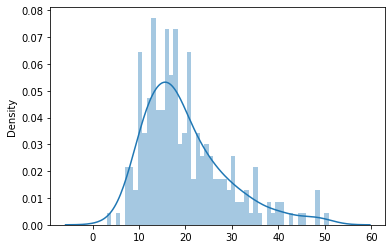

In [15]:
sns.distplot(x=t_bill, bins =50)

In [16]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [17]:
# 모든 값들을 엔코딩하기

In [18]:
tips['sex']=tips['sex'].replace({'Female': 0, 'Male' :1})

In [19]:
tips['smoker']=tips['smoker'].replace({'No': 0, 'Yes' :1})

In [20]:
tips['day'].unique() #day의 입력값 종류를 확인

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [21]:
tips['day']=tips['day'].replace({'Thur': 0, 'Fri' :1, 'Sat' :2, 'Sun' :3})

In [22]:
tips['time']=tips['time'].replace({'Lunch': 0, 'Dinner' :1})

In [23]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3


In [24]:
tips['tip_rate']=(tips["tip"] / tips["total_bill"]) #tip_rate가 하나 더 생성 (파생변수)

In [25]:
tips.describe()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.725410,0.721311,2.569672,0.160803
std,8.902412,1.383638,0.479967,0.486667,1.155774,0.449276,0.951100,0.061072
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.035638
25%,13.347500,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.129127
50%,17.795000,2.900000,1.000000,0.000000,2.000000,1.000000,2.000000,0.154770
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000,0.191475
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000,0.710345


In [26]:
top_tip = (tips['tip_rate'] > 0.7) # 다시 확인하기 !!

In [27]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   day         244 non-null    int64  
 5   time        244 non-null    int64  
 6   size        244 non-null    int64  
 7   tip_rate    244 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 15.4 KB


In [28]:
import pandas_profiling

In [29]:
tips.profile_report()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
pd.crosstab(index=tips['size'],columns='count')

col_0,count
size,
1,4
2,156
3,38
4,37
5,5
6,4


In [31]:
size_tip=pd.crosstab(index=tips['size'],columns=tips['tip'])

In [32]:
size_t_bill=pd.crosstab(index=tips['size'],columns=tips['total_bill'])

In [33]:
size_t_bill

total_bill,3.07,5.75,7.25,7.51,7.56,7.74,8.35,8.51,8.52,8.58,...,40.17,40.55,41.19,43.11,44.30,45.35,48.17,48.27,48.33,50.81
size,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,1,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:xlabel='size'>

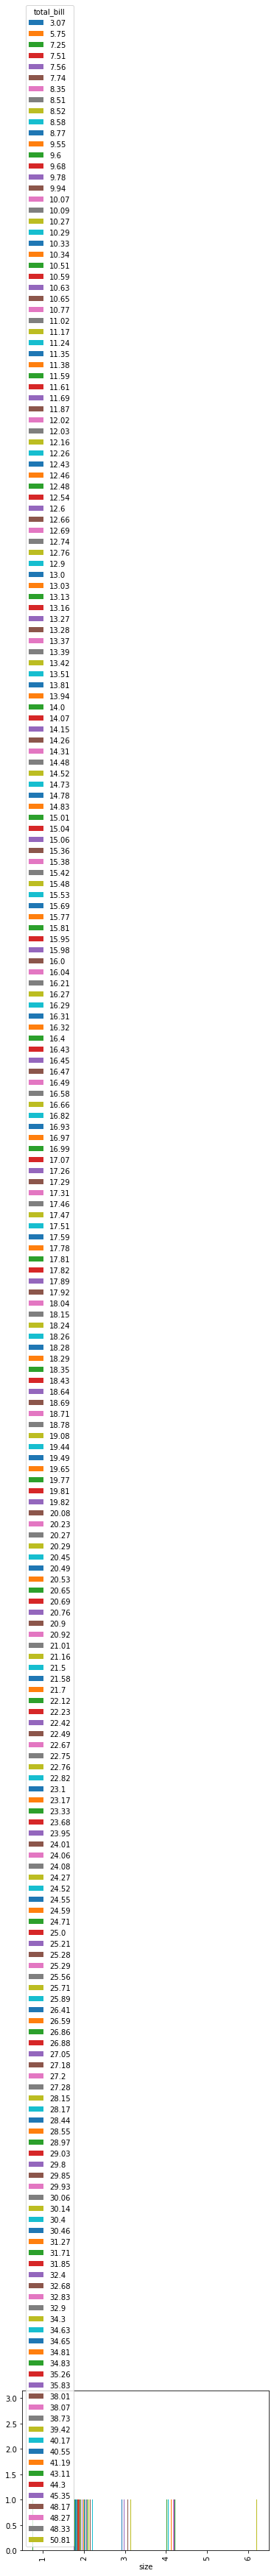

In [34]:
size_t_bill.plot.bar()

In [35]:
import numpy as np

In [36]:
tips.assign(tip_rate=tips["tip"] / tips["total_bill"]).head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,0,0,3,1,2,0.059447
1,10.34,1.66,1,0,3,1,3,0.160542
2,21.01,3.50,1,0,3,1,3,0.166587
3,23.68,3.31,1,0,3,1,2,0.139780
4,24.59,3.61,0,0,3,1,4,0.146808


In [37]:
tips[tips["time"] == "Dinner"].head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate


In [38]:
tips[tips["time"] == "Lunch"].total_bill.count()

0

In [39]:
tips.iloc[:,1]

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [40]:
tips[tips["time"] == "Lunch"].total_bill.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: total_bill, dtype: float64

<AxesSubplot:>

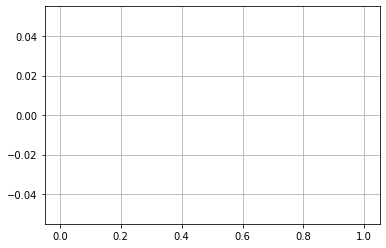

In [41]:
tips[tips["time"] == "Lunch"].total_bill.hist()

In [42]:
tips[tips["time"] == "Dinner"].total_bill.count()

0

In [43]:
tips[tips["time"] == "Dinner"].total_bill.max()

nan

<AxesSubplot:>

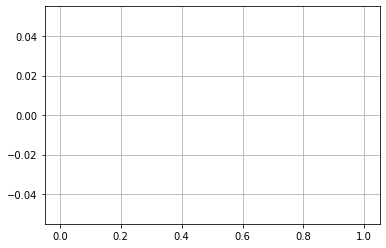

In [44]:
tips[tips["time"] == "Dinner"].total_bill.hist()

In [45]:
tips["time"].head()

0    1
1    1
2    1
3    1
4    1
Name: time, dtype: int64

In [46]:
is_dinner = tips["time"] == "Dinner"

In [47]:
is_dinner

0      False
1      False
2      False
3      False
4      False
       ...  
239    False
240    False
241    False
242    False
243    False
Name: time, Length: 244, dtype: bool

In [48]:
tips[tips["time"] == "Dinner"].count()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
tip_rate      0
dtype: int64

In [49]:
tips[is_dinner].count()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
tip_rate      0
dtype: int64

In [50]:
tips[is_dinner & (tips["tip"] >5)]

,total_bill,tip,sex,smoker,day,time,size,tip_rate


In [51]:
tips[(tips["size"] >= 5) | (tips["total_bill"] > 45)].count()

total_bill    13
tip           13
sex           13
smoker        13
day           13
time          13
size          13
tip_rate      13
dtype: int64

In [52]:
frame = pd.DataFrame(
      {"col1": ["A", "B", np.NaN, "C", "D"], "col2": ["F", np.NaN, "G", "H", "I"]}
  )

In [53]:
frame

,col1,col2
0,A,F
1,B,NaN
2,NaN,G
3,C,H
4,D,I


In [54]:
frame[frame["col2"].isna()]

,col1,col2
1,B,NaN


In [55]:
frame.iloc[2,:]

col1    NaN
col2      G
Name: 2, dtype: object

In [56]:
tips.groupby("day").count()

,total_bill,tip,sex,smoker,time,size,tip_rate
day,,,,,,,
0,62,62,62,62,62,62,62
1,19,19,19,19,19,19,19
2,87,87,87,87,87,87,87
3,76,76,76,76,76,76,76


In [57]:
group = tips.groupby("day")

In [58]:
df1 = group.count()

In [59]:
df1["size"]

day
0    62
1    19
2    87
3    76
Name: size, dtype: int64

In [60]:
df1.describe()

,total_bill,tip,sex,smoker,time,size,tip_rate
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
std,29.810513,29.810513,29.810513,29.810513,29.810513,29.810513,29.810513
min,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
25%,51.250000,51.250000,51.250000,51.250000,51.250000,51.250000,51.250000
50%,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
75%,78.750000,78.750000,78.750000,78.750000,78.750000,78.750000,78.750000
max,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
